<a href="https://www.kaggle.com/code/kennytanner/eda-w-pipeline-house-prices-please-review?scriptVersionId=115696686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
                                                                                                                                                                                                            # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df_test= pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_train= pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

# 1. EDA

## 1.1. A brief look at the target first

In [4]:
y=df_train['SalePrice']
X=df_train

y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

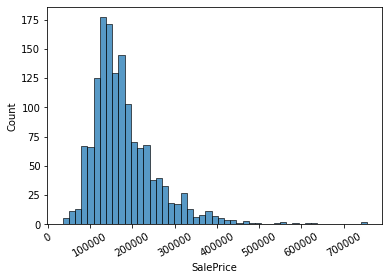

In [5]:
sns.histplot(y)
plt.xticks(rotation=30)
plt.show()

Peakedness with deviation from the normal distribution.

Skewed right. With no negative sale price and some houses sold for large amounts we see that heavy tail

In [6]:
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## 1.2. Check for Duplicates

In [7]:
X.duplicated().sum()

0

## 1.3. Features

In [8]:
features = X.columns

numerical_features = X._get_numeric_data().columns

categorical_features = list(set(features)-set(numerical_features))

numerical_features = list(set(numerical_features))
numerical_features.remove('Id')

<Figure size 432x288 with 0 Axes>

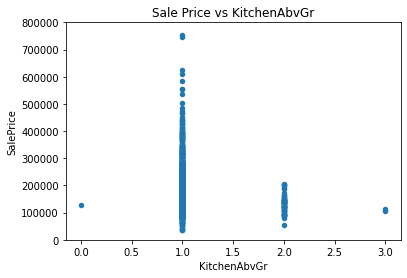

<Figure size 432x288 with 0 Axes>

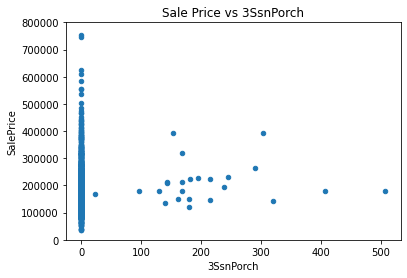

<Figure size 432x288 with 0 Axes>

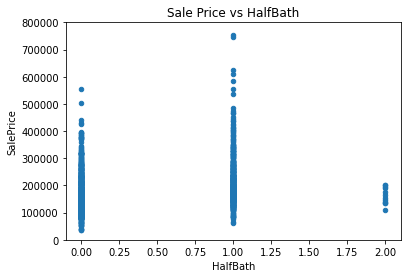

<Figure size 432x288 with 0 Axes>

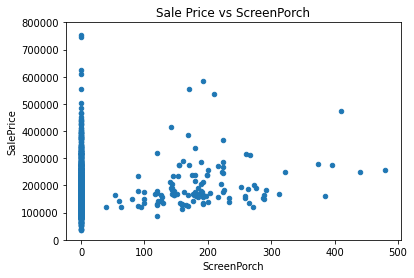

<Figure size 432x288 with 0 Axes>

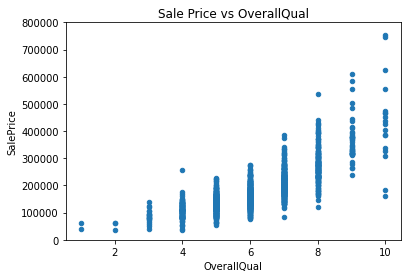

<Figure size 432x288 with 0 Axes>

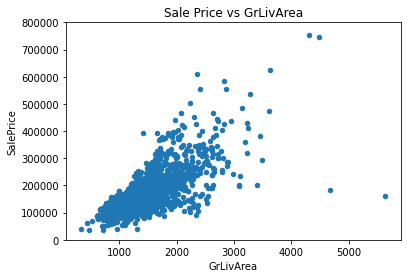

<Figure size 432x288 with 0 Axes>

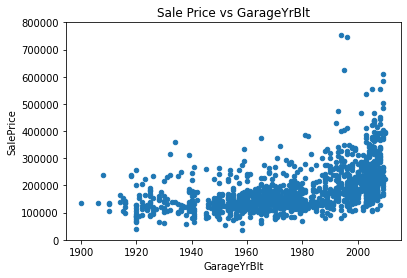

<Figure size 432x288 with 0 Axes>

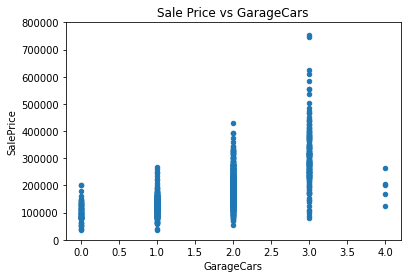

<Figure size 432x288 with 0 Axes>

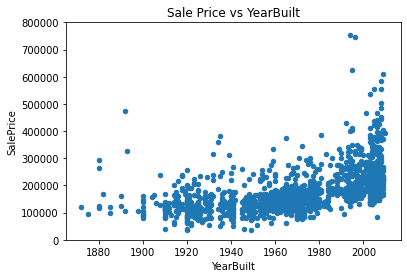

<Figure size 432x288 with 0 Axes>

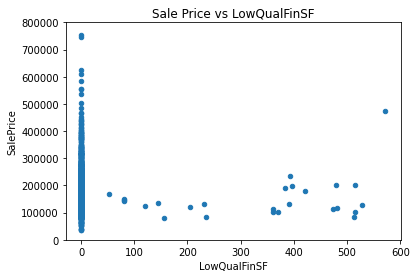

<Figure size 432x288 with 0 Axes>

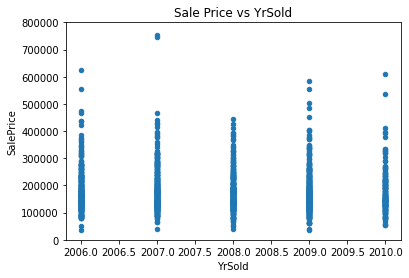

<Figure size 432x288 with 0 Axes>

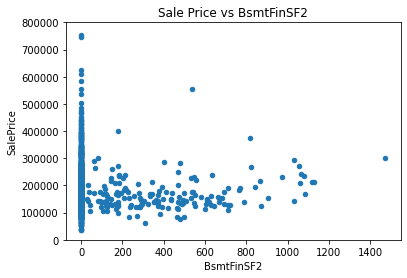

<Figure size 432x288 with 0 Axes>

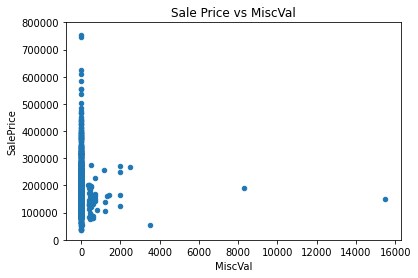

<Figure size 432x288 with 0 Axes>

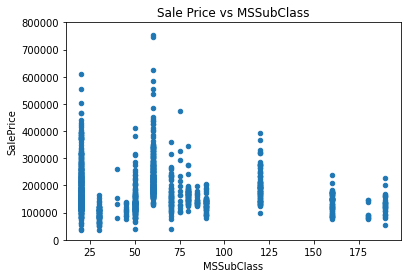

<Figure size 432x288 with 0 Axes>

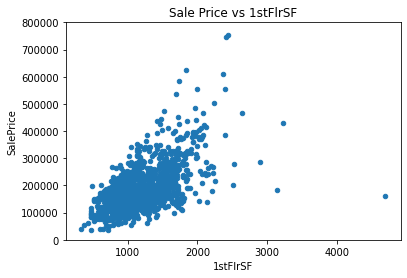

<Figure size 432x288 with 0 Axes>

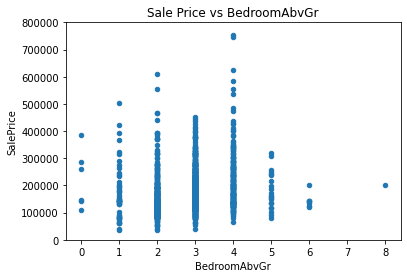

<Figure size 432x288 with 0 Axes>

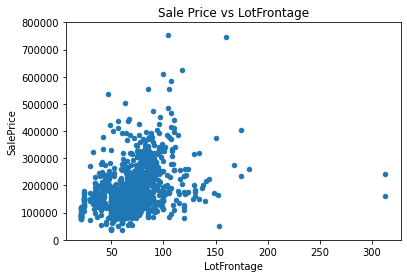

<Figure size 432x288 with 0 Axes>

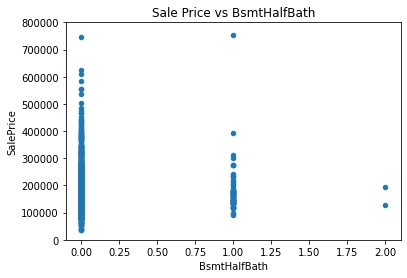

<Figure size 432x288 with 0 Axes>

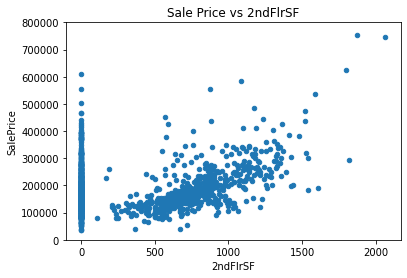

<Figure size 432x288 with 0 Axes>

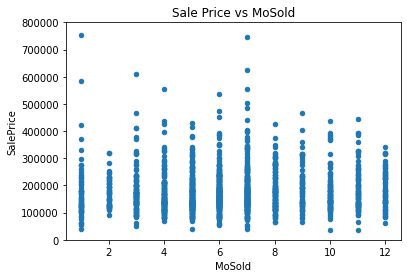

<Figure size 432x288 with 0 Axes>

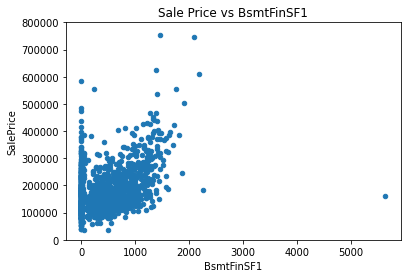

<Figure size 432x288 with 0 Axes>

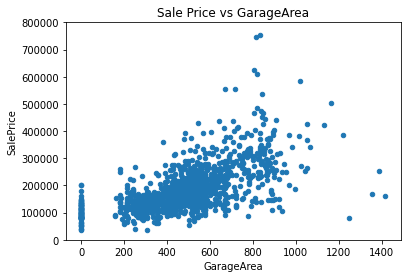

<Figure size 432x288 with 0 Axes>

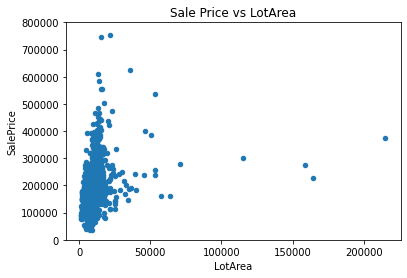

<Figure size 432x288 with 0 Axes>

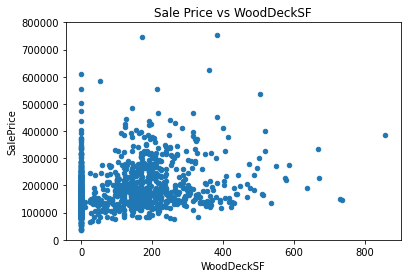

<Figure size 432x288 with 0 Axes>

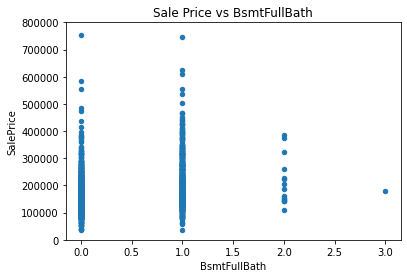

<Figure size 432x288 with 0 Axes>

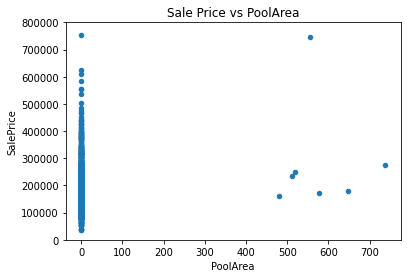

<Figure size 432x288 with 0 Axes>

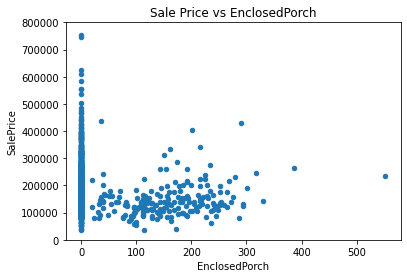

<Figure size 432x288 with 0 Axes>

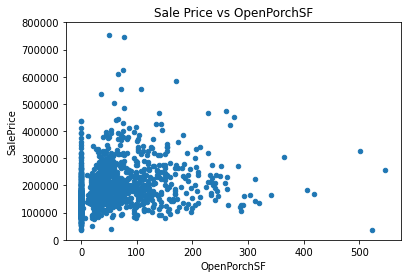

<Figure size 432x288 with 0 Axes>

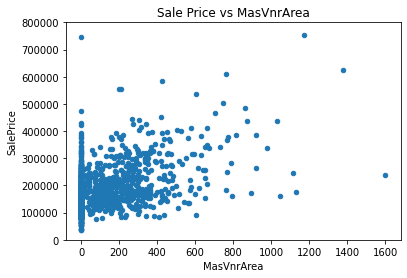

<Figure size 432x288 with 0 Axes>

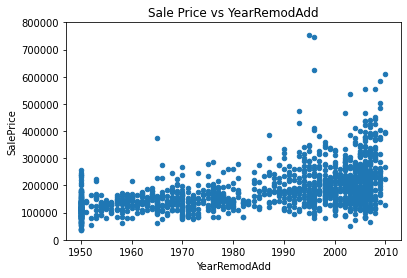

<Figure size 432x288 with 0 Axes>

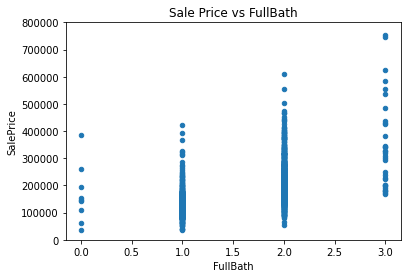

<Figure size 432x288 with 0 Axes>

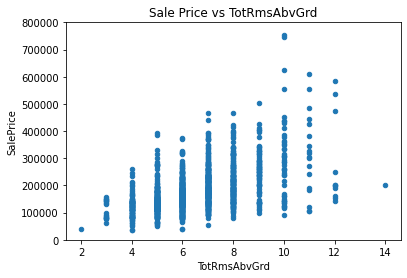

<Figure size 432x288 with 0 Axes>

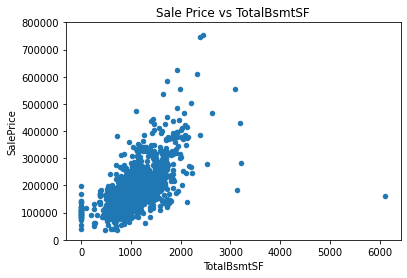

<Figure size 432x288 with 0 Axes>

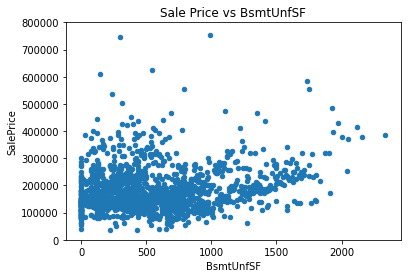

<Figure size 432x288 with 0 Axes>

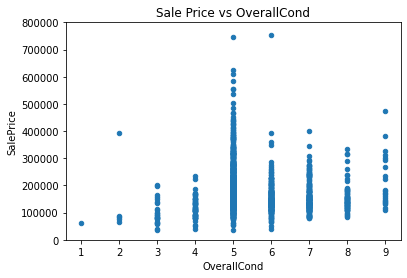

<Figure size 432x288 with 0 Axes>

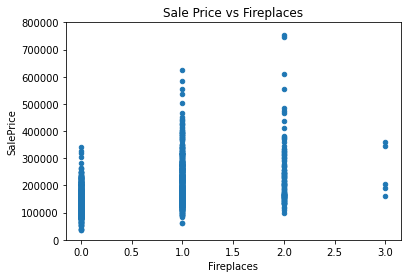

In [9]:
for column in numerical_features:
    if column == 'SalePrice':
        continue
    plt.clf()
    X.plot.scatter(x=column, y= 'SalePrice', ylim=(0,800000))
    plt.title(f'Sale Price vs {column}')
    plt.show()

A better look at those discrete feature distributions

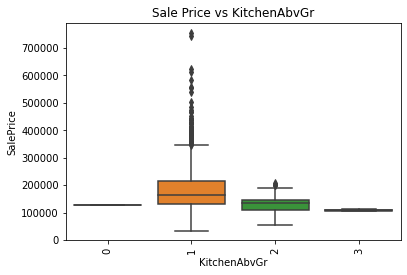

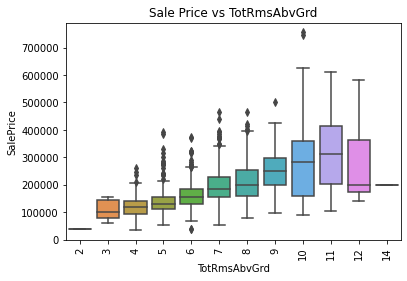

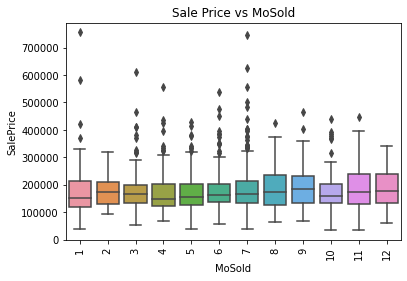

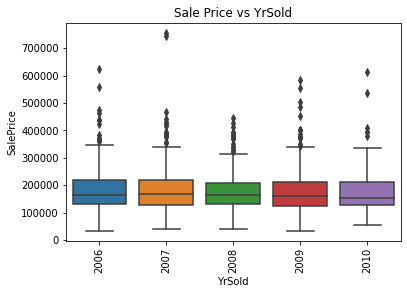

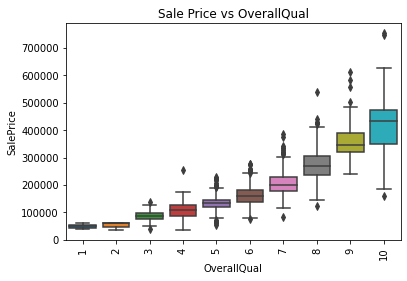

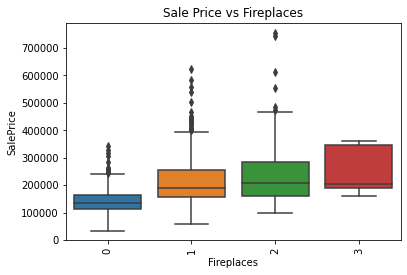

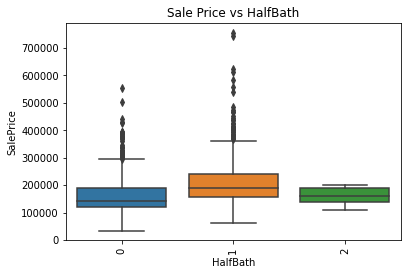

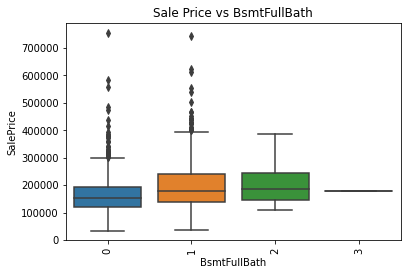

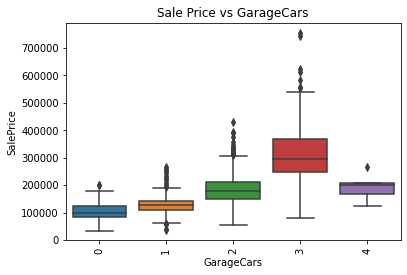

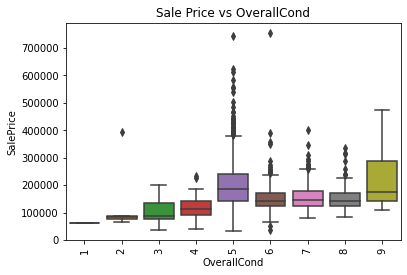

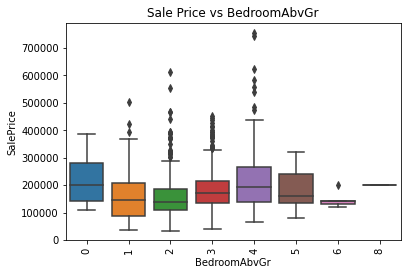

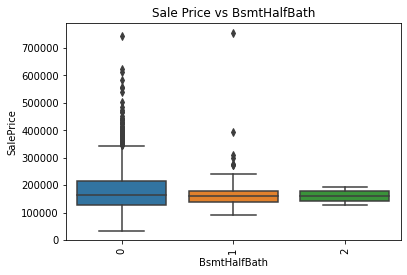

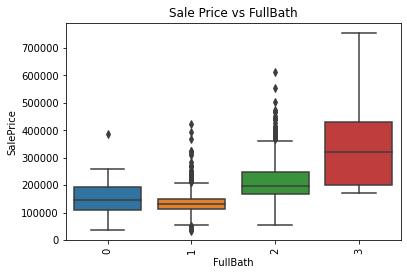

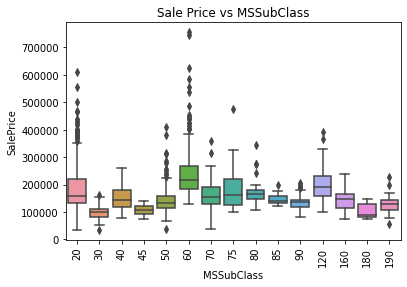

<Figure size 432x288 with 0 Axes>

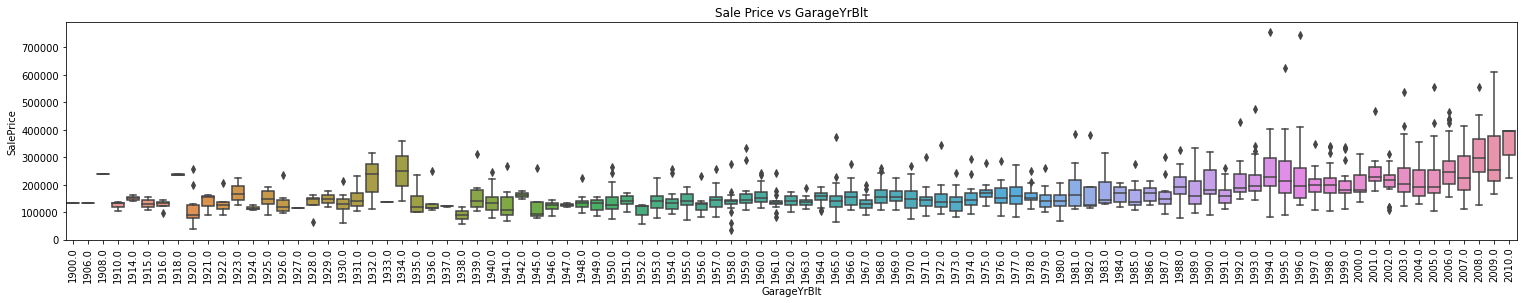

<Figure size 432x288 with 0 Axes>

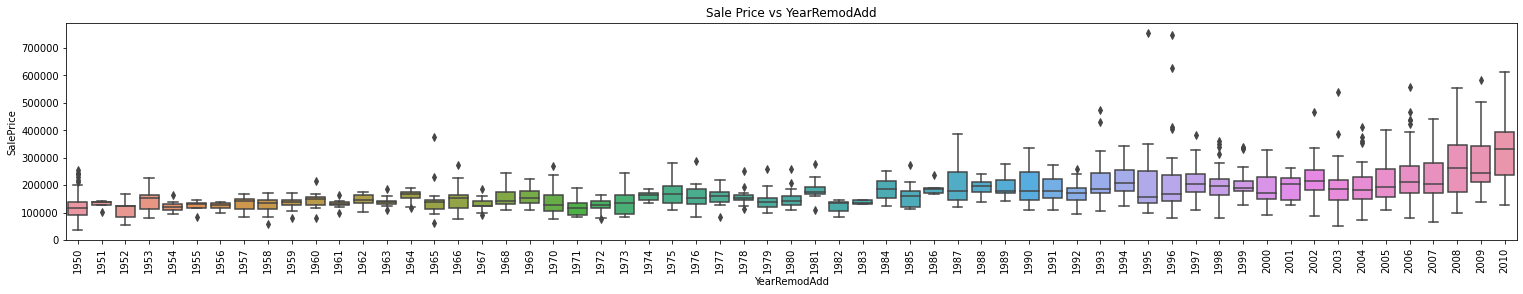

<Figure size 432x288 with 0 Axes>

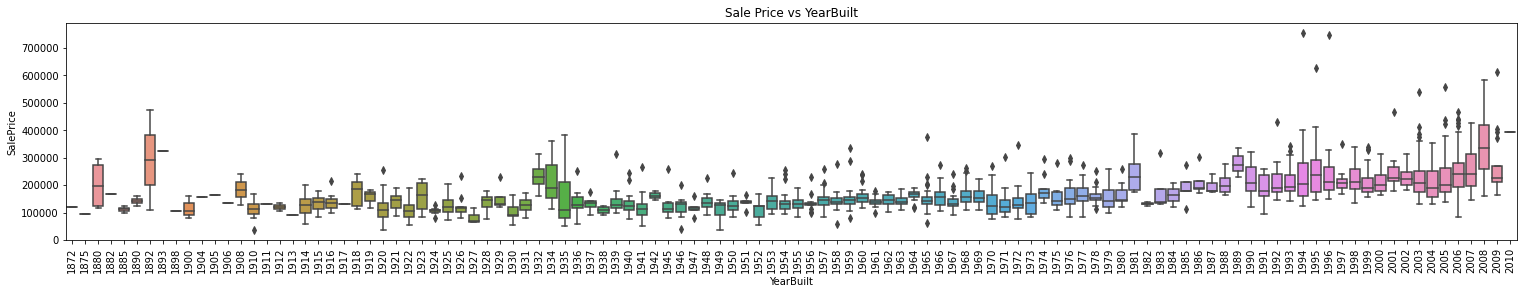

In [10]:
discrete_features = ['KitchenAbvGr', 'TotRmsAbvGrd', 'MoSold', 'YrSold', 'OverallQual', 'Fireplaces', 'HalfBath', 'BsmtFullBath',
                     'GarageCars', 'OverallCond', 'BedroomAbvGr', 'BsmtHalfBath', 'FullBath', 'MSSubClass', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt']

for column in discrete_features:
    plt.clf()
    if column in ['GarageYrBlt', 'YearRemodAdd', 'YearBuilt']:
        plt.figure(figsize=(26,4))
    sns.boxplot(x=column, y='SalePrice', data=X)
    plt.xticks(rotation=90)
    plt.title(f'Sale Price vs {column}')
    plt.show()

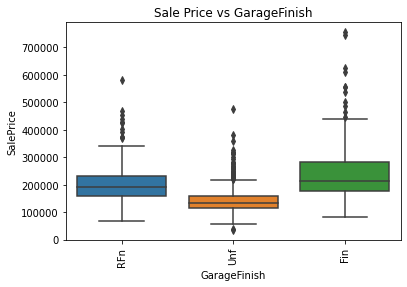

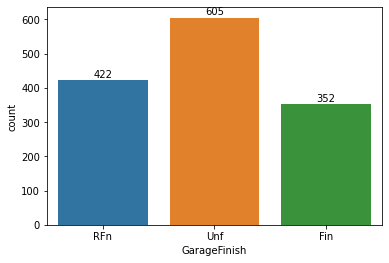

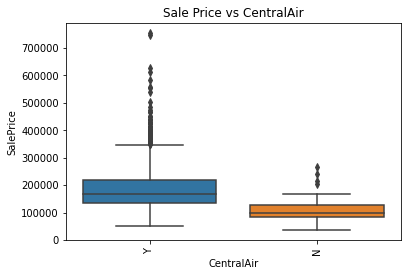

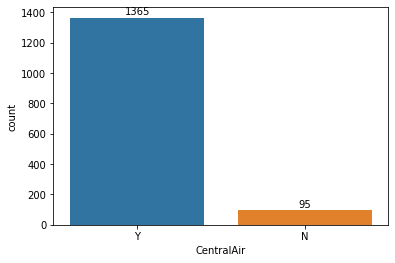

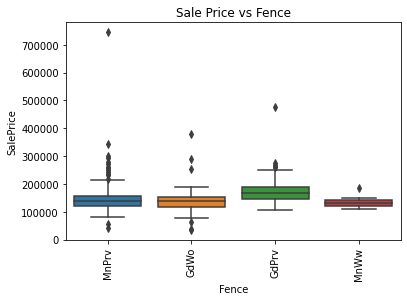

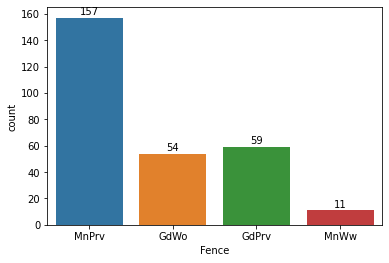

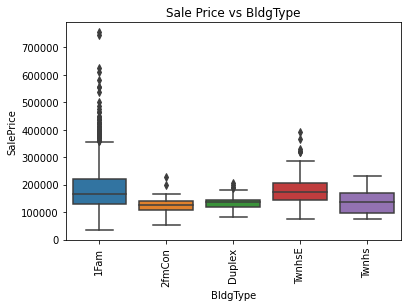

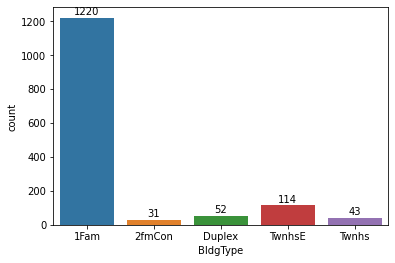

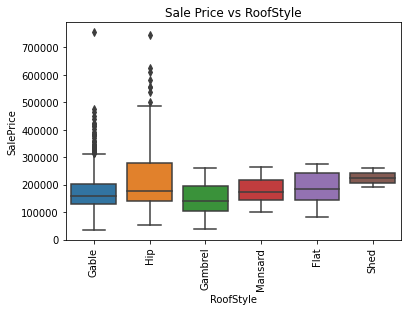

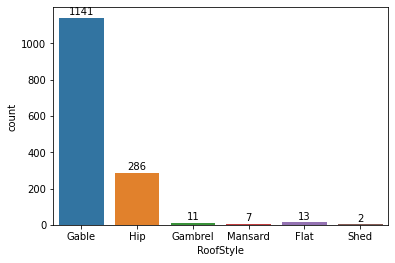

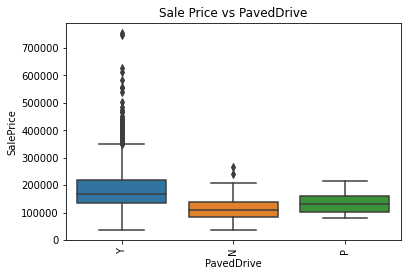

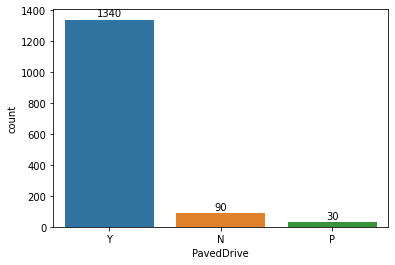

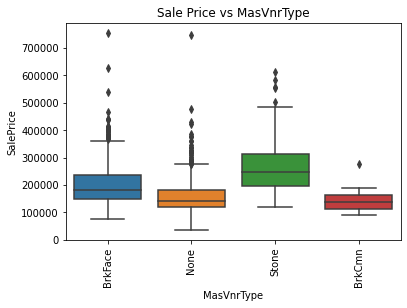

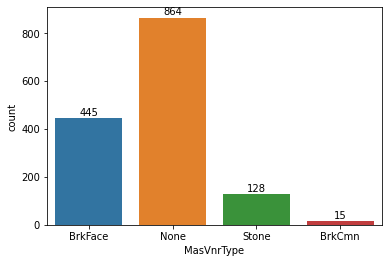

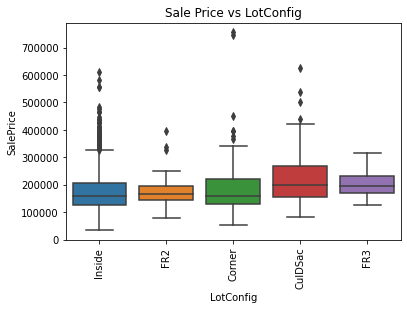

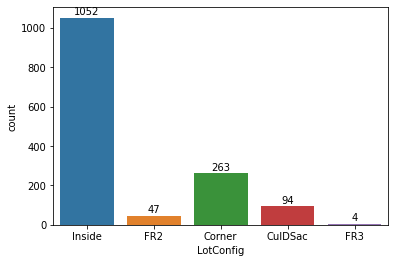

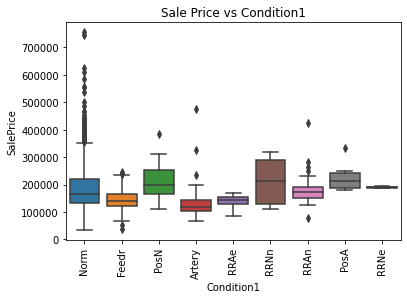

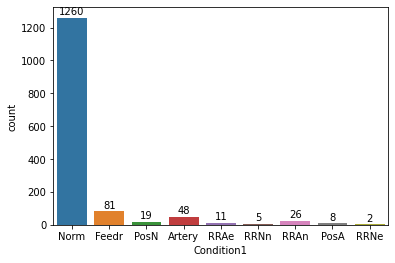

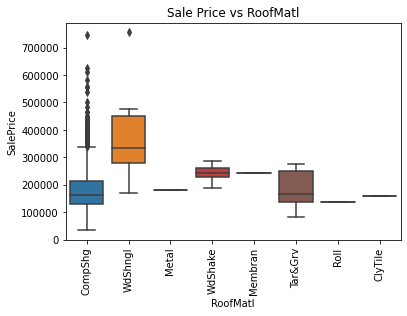

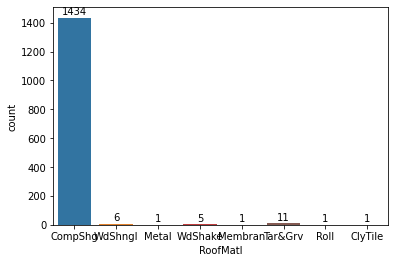

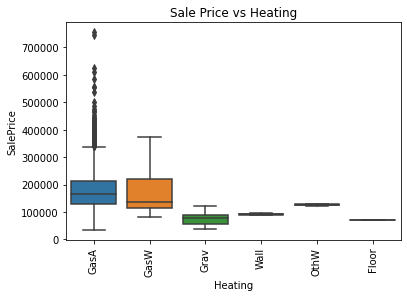

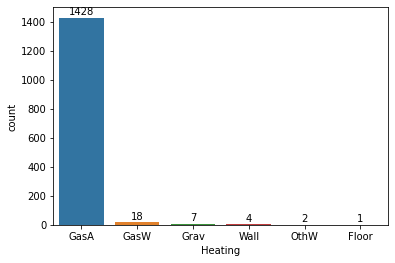

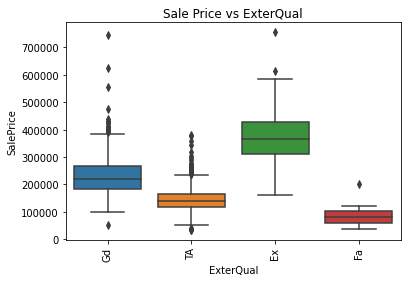

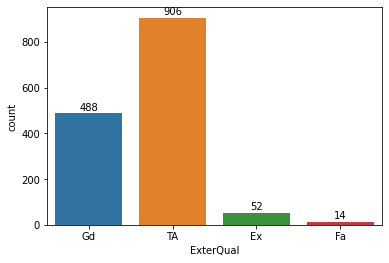

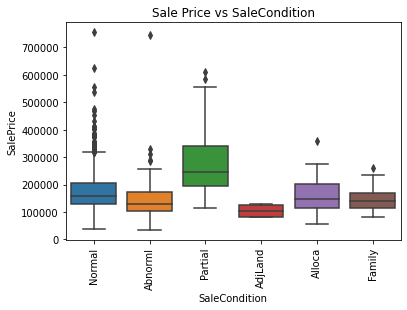

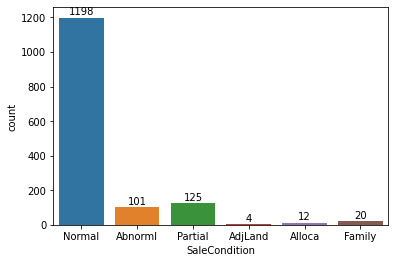

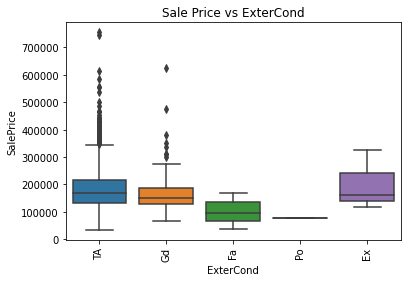

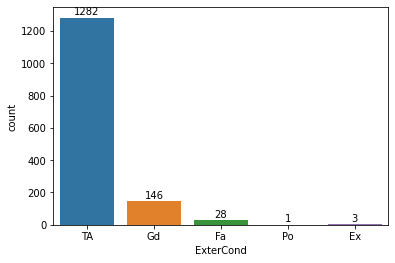

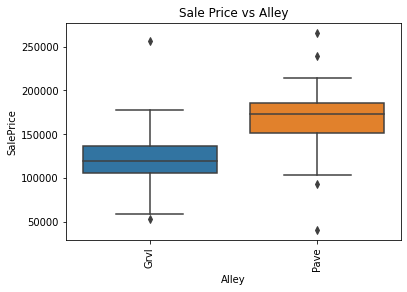

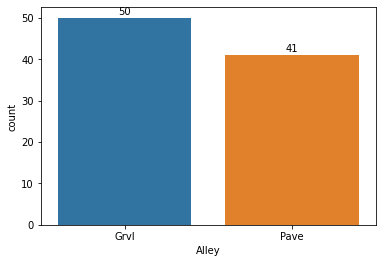

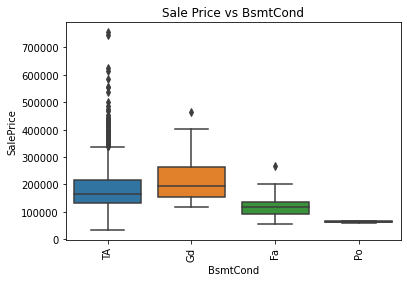

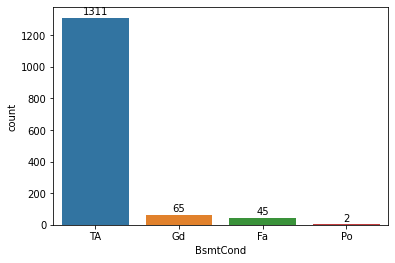

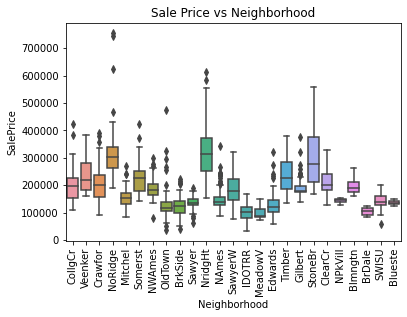

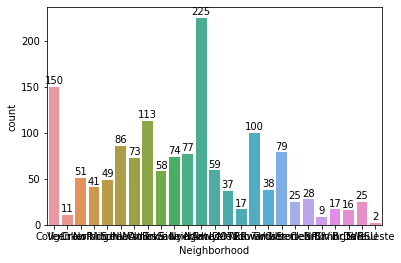

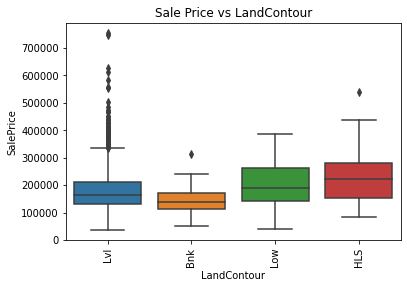

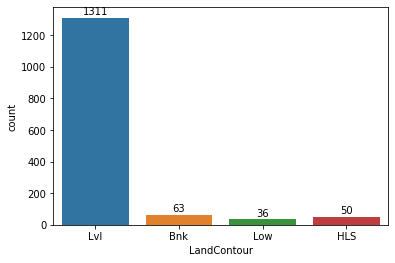

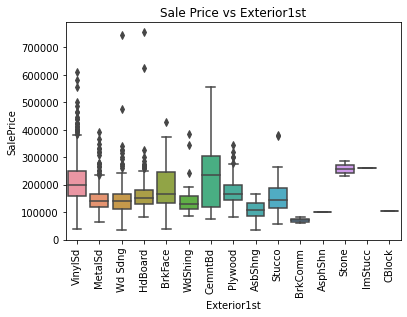

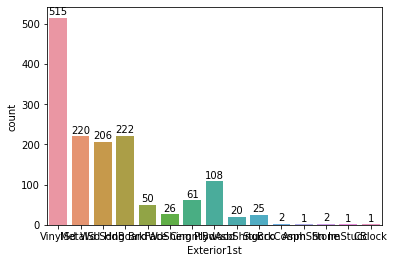

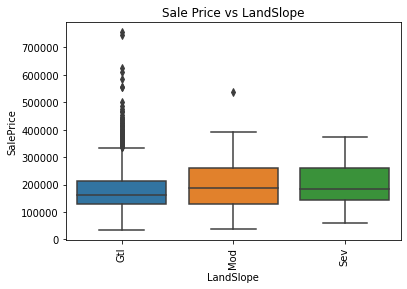

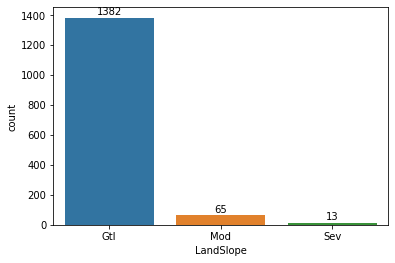

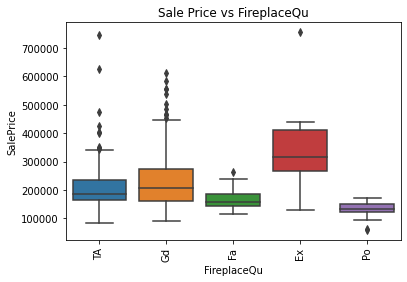

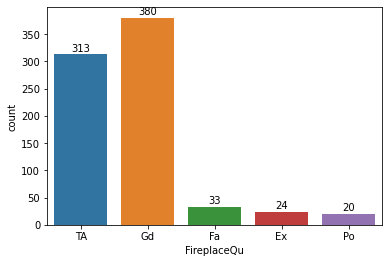

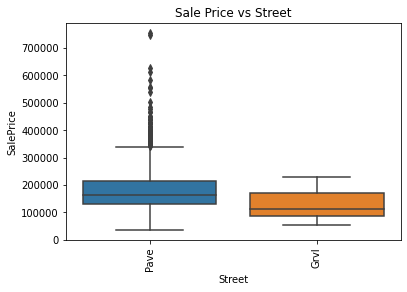

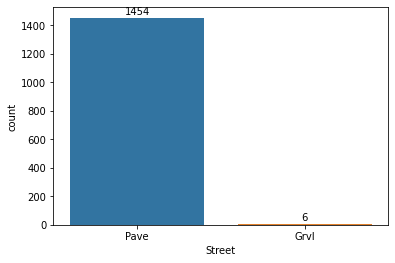

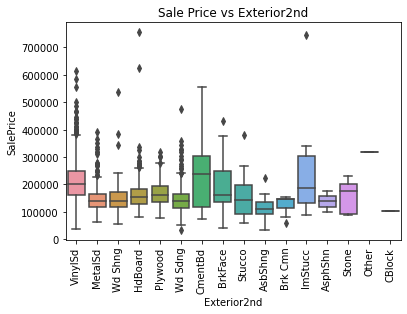

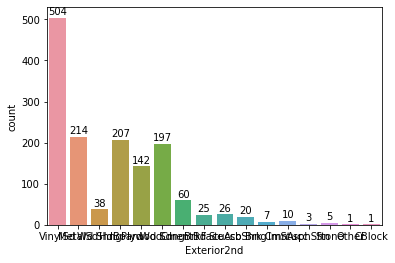

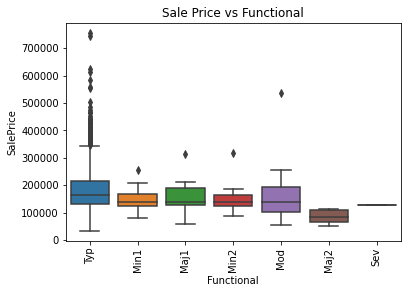

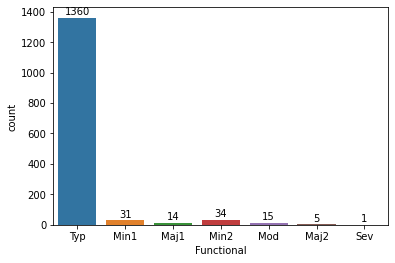

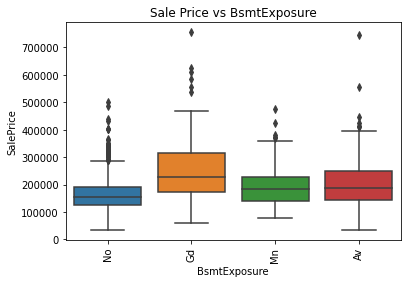

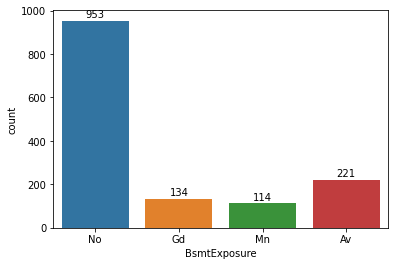

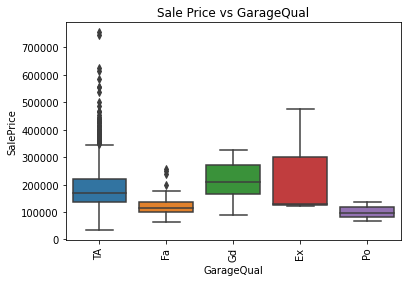

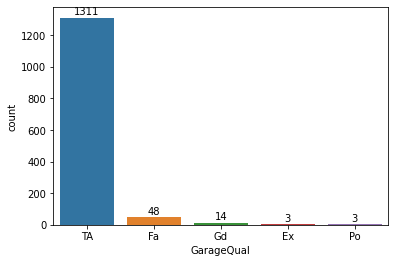

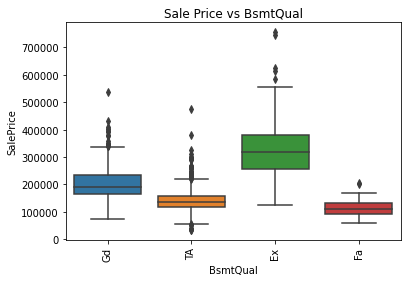

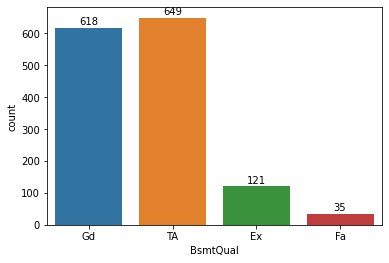

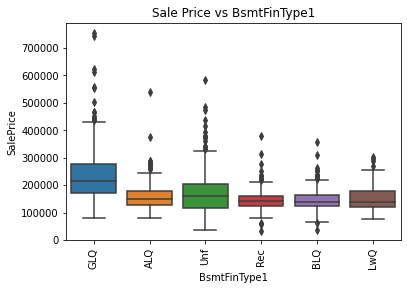

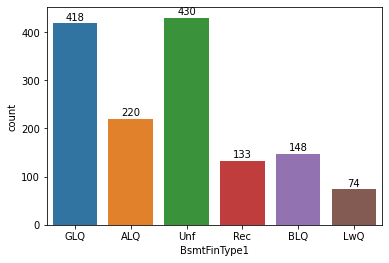

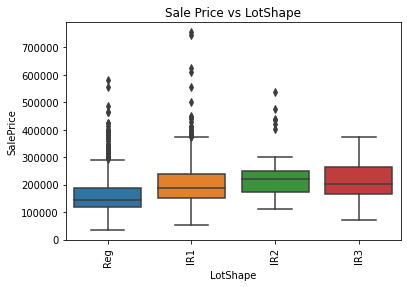

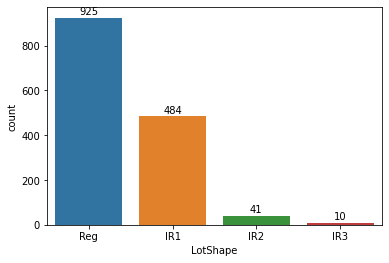

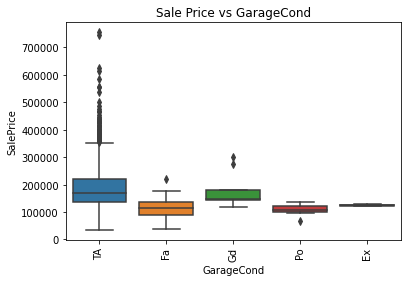

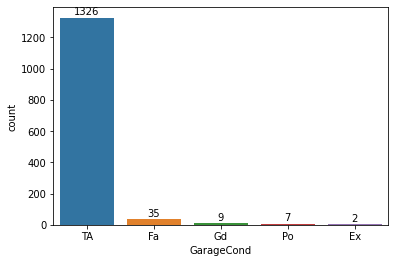

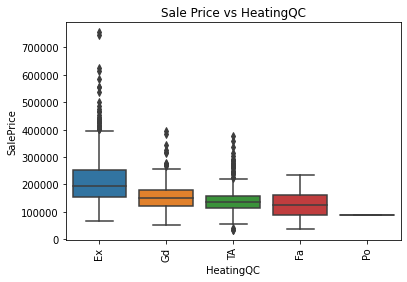

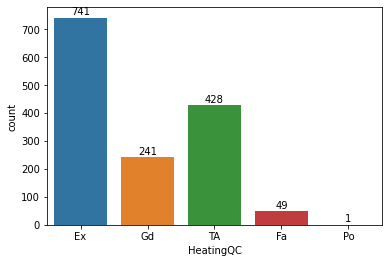

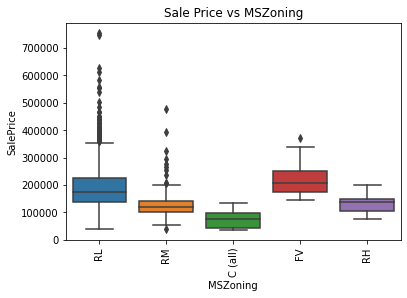

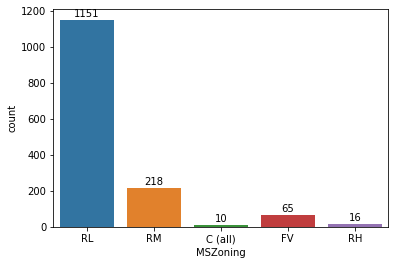

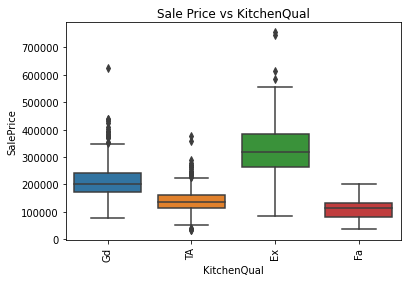

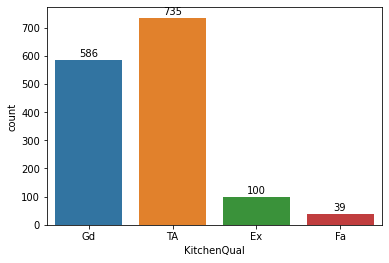

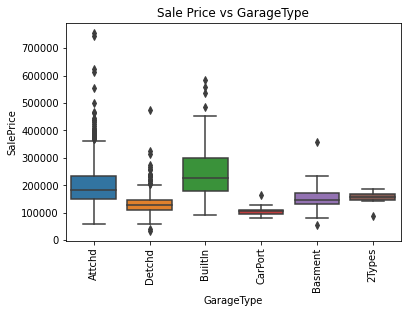

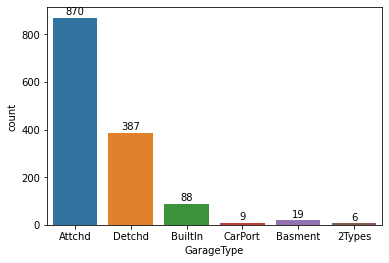

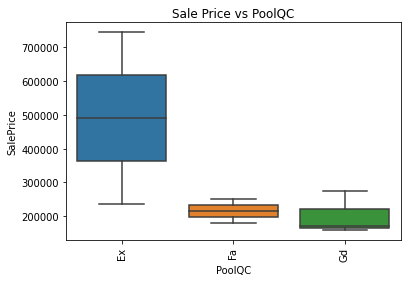

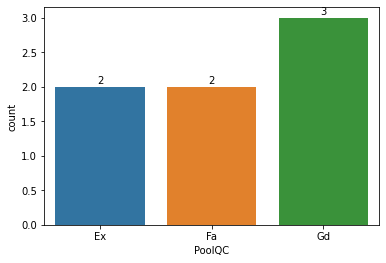

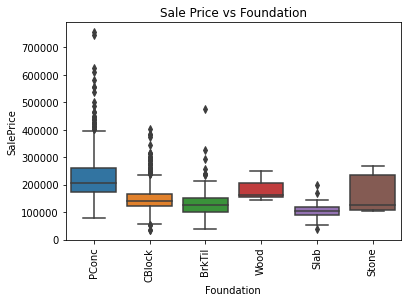

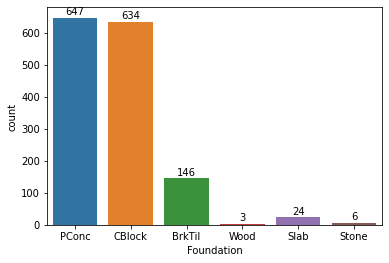

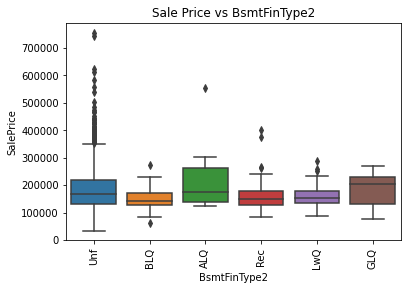

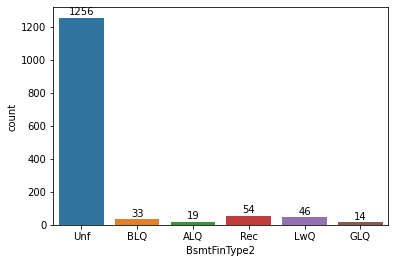

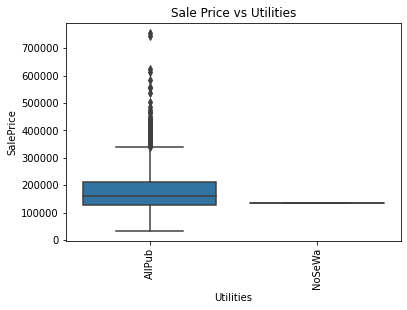

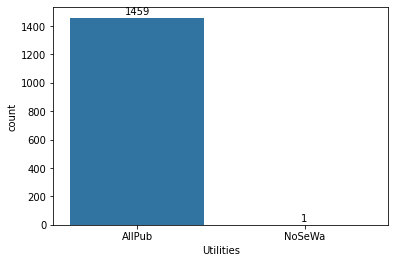

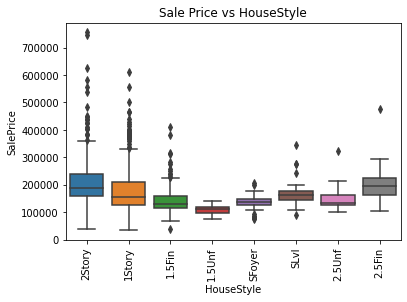

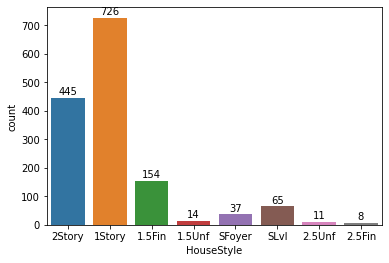

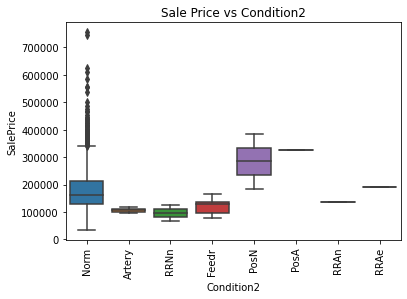

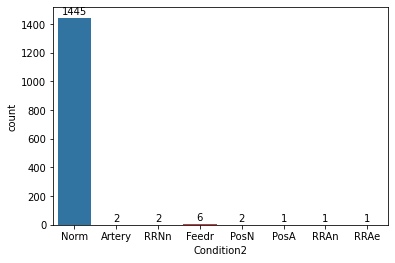

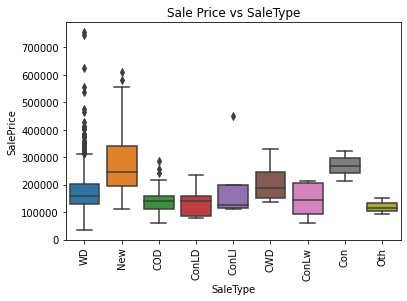

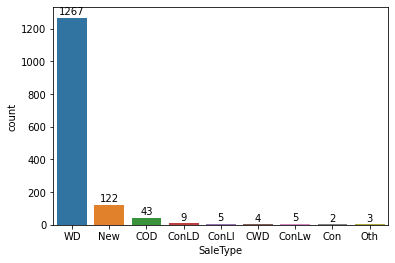

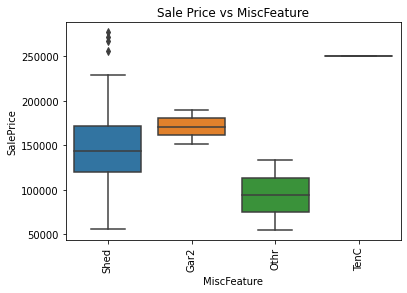

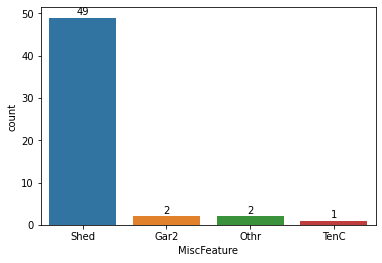

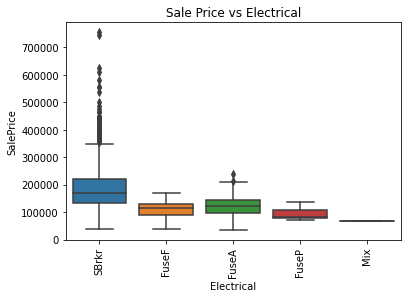

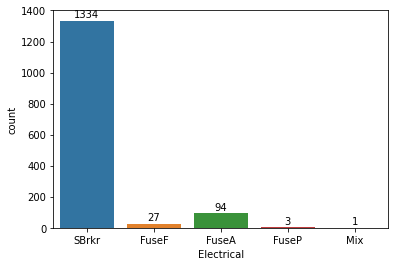

In [11]:
for column in categorical_features:
    plt.clf()
    sns.boxplot(x=column, y='SalePrice', data=X)
    plt.xticks(rotation=90)
    plt.title(f'Sale Price vs {column}')
    plt.show()
    plt.clf()
    fig = sns.countplot(x=X[column])
    for bar in fig.patches:
        fig.annotate(format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2,
        bar.get_height()), ha='center', va='center',
        size=10, xytext=(0,6), textcoords='offset points')
    plt.show()

# 2. Preprocessing

## 2.1. Missing Data, Collinearity, and Data Removal

In [12]:
total = X.isnull().sum().sort_values(ascending=False)
percent = 100*(X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
test_total = df_test.isnull().sum().sort_values(ascending=False)
test_percent = 100*(df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent, test_total, test_percent], axis=1, keys=['Train_Total', 'Train_Percent', 'Test_Total', 'Test_Percent'])

missing_data[(missing_data.Train_Total >0) | (missing_data.Test_Total > 0)]

,Train_Total,Train_Percent,Test_Total,Test_Percent
PoolQC,1453,99.520548,1456.0,99.794380
MiscFeature,1406,96.301370,1408.0,96.504455
Alley,1369,93.767123,1352.0,92.666210
Fence,1179,80.753425,1169.0,80.123372
FireplaceQu,690,47.260274,730.0,50.034270
LotFrontage,259,17.739726,227.0,15.558602
GarageYrBlt,81,5.547945,78.0,5.346127
GarageCond,81,5.547945,78.0,5.346127
GarageType,81,5.547945,76.0,5.209047
GarageFinish,81,5.547945,78.0,5.346127


With over half the test data missing for: pool quality, miscellaneous features, type of alley access, fence quality and fireplace quality it is certainly safest to remove them.

Linear feet of street connected to property (LotFrontage) also has a lot of missing data. Removal appears best here as well. From what I have seen, this measure is often in no small part due to the type of housing. Also a strong negative correlation is shown with the type of dwelling (MSSubClass) in the training data (shown below) I expect that the important information may already be contained in that feature.

Missing masonry veneer data (MasVnrArea & MasVnrType) could be due to difficulty identifing if the masonry was actually structural etc. These are also well correlated with OveralQual and YearBuilt, and overall it does not appear that significant information is lost removing them too.

Similar story with the missing data in the basement variables. And shown most clearly in the correlation matrix comming up, the basement size is the most important, with the missing extra variables not appearingto add much.

<AxesSubplot:>

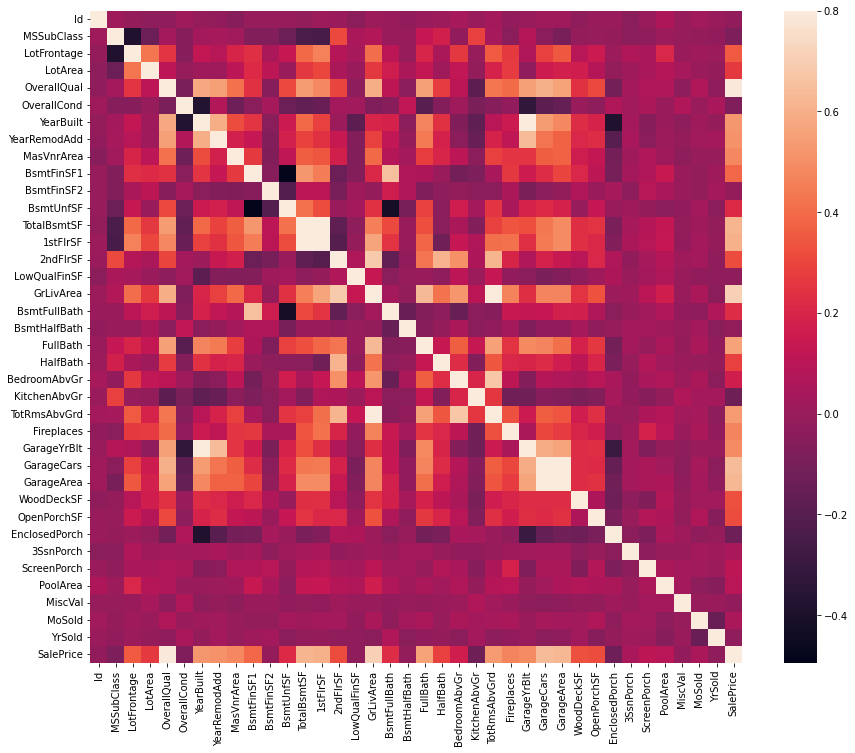

In [13]:
corrmat = X.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax = .8, square = True)

Noticable collinearity between:
- The total square feet of basement area (TotalBsmtSF) ----- & ----- First Floor square feet (1stFlrSF) 
- Size of garage in car capacity (GarageCars) ----- & ----- Size of garage in square feet (GarageArea) 
- Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd) ----- & ----- Above grade (ground) living area square feet (GrLivArea) 
- Original construction date (YearBuilt) ----- & ----- Year garage was built (GarageYrBlt) 

Not hard to see how the members of these pairs are, at least in part, reflecting the same information...

- And looking at the target (Sale Price), both Overall material and finish quality (OverallQual) and Above grade (ground) living area square feet (GrLivArea), are very well correlated

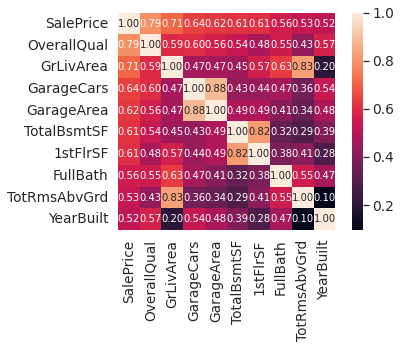

In [14]:
corrmat = X.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

With respect to garages, the size of the garage's car capacity (GarageCars) appears to be the most important information people consider. We can see in this correlation matrix that it is in fact the fourth most correlated with the sale price out of all the features.

Unsurprisingly it is highly correlated with GarageArea. Since the test data has the same amount of missing data in both of the two I prefer to imupte the car capacity as I do not wish to lose it. But the garage area can be dropped (not wishing to overfeed highly related data) as can the other garage related feautres as they appear subsidiary and are many are missing much more data.

### Removing partners in collinear pairs that appear corollary, and/or missing data.

Removing:
- All the garage features with missing data in the training set (the car capacity appears the most valuable missing in the test data - imputing that single value will be ok though)
- Total rooms above grade (~ground) - too collinear with above ground living area, considering the room information is contained in other features anyway
- Basement features with missing data in the training set. Basement SF is clearly the primary concern for buyers anyway.
- Masonry Vaneer features - well correlated with overall quality of materials, and year built (far from independent) and lots of missing data.
- Pool quality, miscellaneous features, type of alley access, fence quality and fireplace quality - most of the data is missing anyway
- Linear feet of street connected to property (LotFrontage) - as reasoned above (in the start of the section)

Identified as concerningly collinear, but leaving for now:
- Basement SF correlation to first floor SF is not surprising and do not wish to loose the addiional information (I expect it will be attributed less weighting than first floor in the model... but I'll leave that for the modelling and I certainly don't wish to lose it)
- Garage year built - similar to basement SF

In [15]:
unwanted_missing_cols=missing_data[(missing_data.Train_Total > 1)].index
unwanted_colinearity_cols = ['GarageArea', 'TotRmsAbvGrd']

X = X.drop(unwanted_missing_cols, axis=1)
X = X.drop(unwanted_colinearity_cols, axis=1)
df_test = df_test.drop(unwanted_missing_cols, axis=1)
df_test = df_test.drop(unwanted_colinearity_cols, axis=1)

In [16]:
total = X.isnull().sum().sort_values(ascending=False)
percent = 100*(X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
test_total = df_test.isnull().sum().sort_values(ascending=False)
test_percent = 100*(df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent, test_total, test_percent], axis=1, keys=['Train_Total', 'Train_Percent', 'Test_Total', 'Test_Percent'])
missing_data[(missing_data.Train_Total >0) | (missing_data.Test_Total > 0)]

,Train_Total,Train_Percent,Test_Total,Test_Percent
Electrical,1,0.068493,0.0,0.00000
BsmtFullBath,0,0.000000,2.0,0.13708
BsmtHalfBath,0,0.000000,2.0,0.13708
KitchenQual,0,0.000000,1.0,0.06854
Functional,0,0.000000,2.0,0.13708
GarageCars,0,0.000000,1.0,0.06854
SaleType,0,0.000000,1.0,0.06854
TotalBsmtSF,0,0.000000,1.0,0.06854
MSZoning,0,0.000000,4.0,0.27416
Utilities,0,0.000000,2.0,0.13708


### How is missing test set data (still remaining) distributed?

Not too concerned with imputing a little but if there are observations missing many of the features, automatically imputing all of them could be misleading. So getting some insight into what to expect, is tremendous.
I wouldn't want to the model to be overly dependent on features that the test set lacks.

In [17]:
from collections import defaultdict

missing_other_data_observations=defaultdict(int)
for col in missing_data[missing_data.Test_Total > 0].index:
    i=df_test[df_test[col].isnull()].index
    missing_other_data_observations[i[0]]+=1
    print( i[0], col)

print(missing_other_data_observations)

660 BsmtFullBath
660 BsmtHalfBath
95 KitchenQual
756 Functional
1116 GarageCars
1029 SaleType
660 TotalBsmtSF
455 MSZoning
455 Utilities
691 Exterior1st
691 Exterior2nd
660 BsmtFinSF1
660 BsmtFinSF2
660 BsmtUnfSF
defaultdict(<class 'int'>, {660: 6, 95: 1, 756: 1, 1116: 1, 1029: 1, 455: 2, 691: 2})


### No indication of serious data leakage concerns.
- No large amounts of data missing from the test set leaving the model to predict based on key data being imputed.
- Only one imputed data point in the training data set. Imputing that one missing electrical data point looks to be better than losing it or sacraficing the whole feature.

## 2.2. Outliers

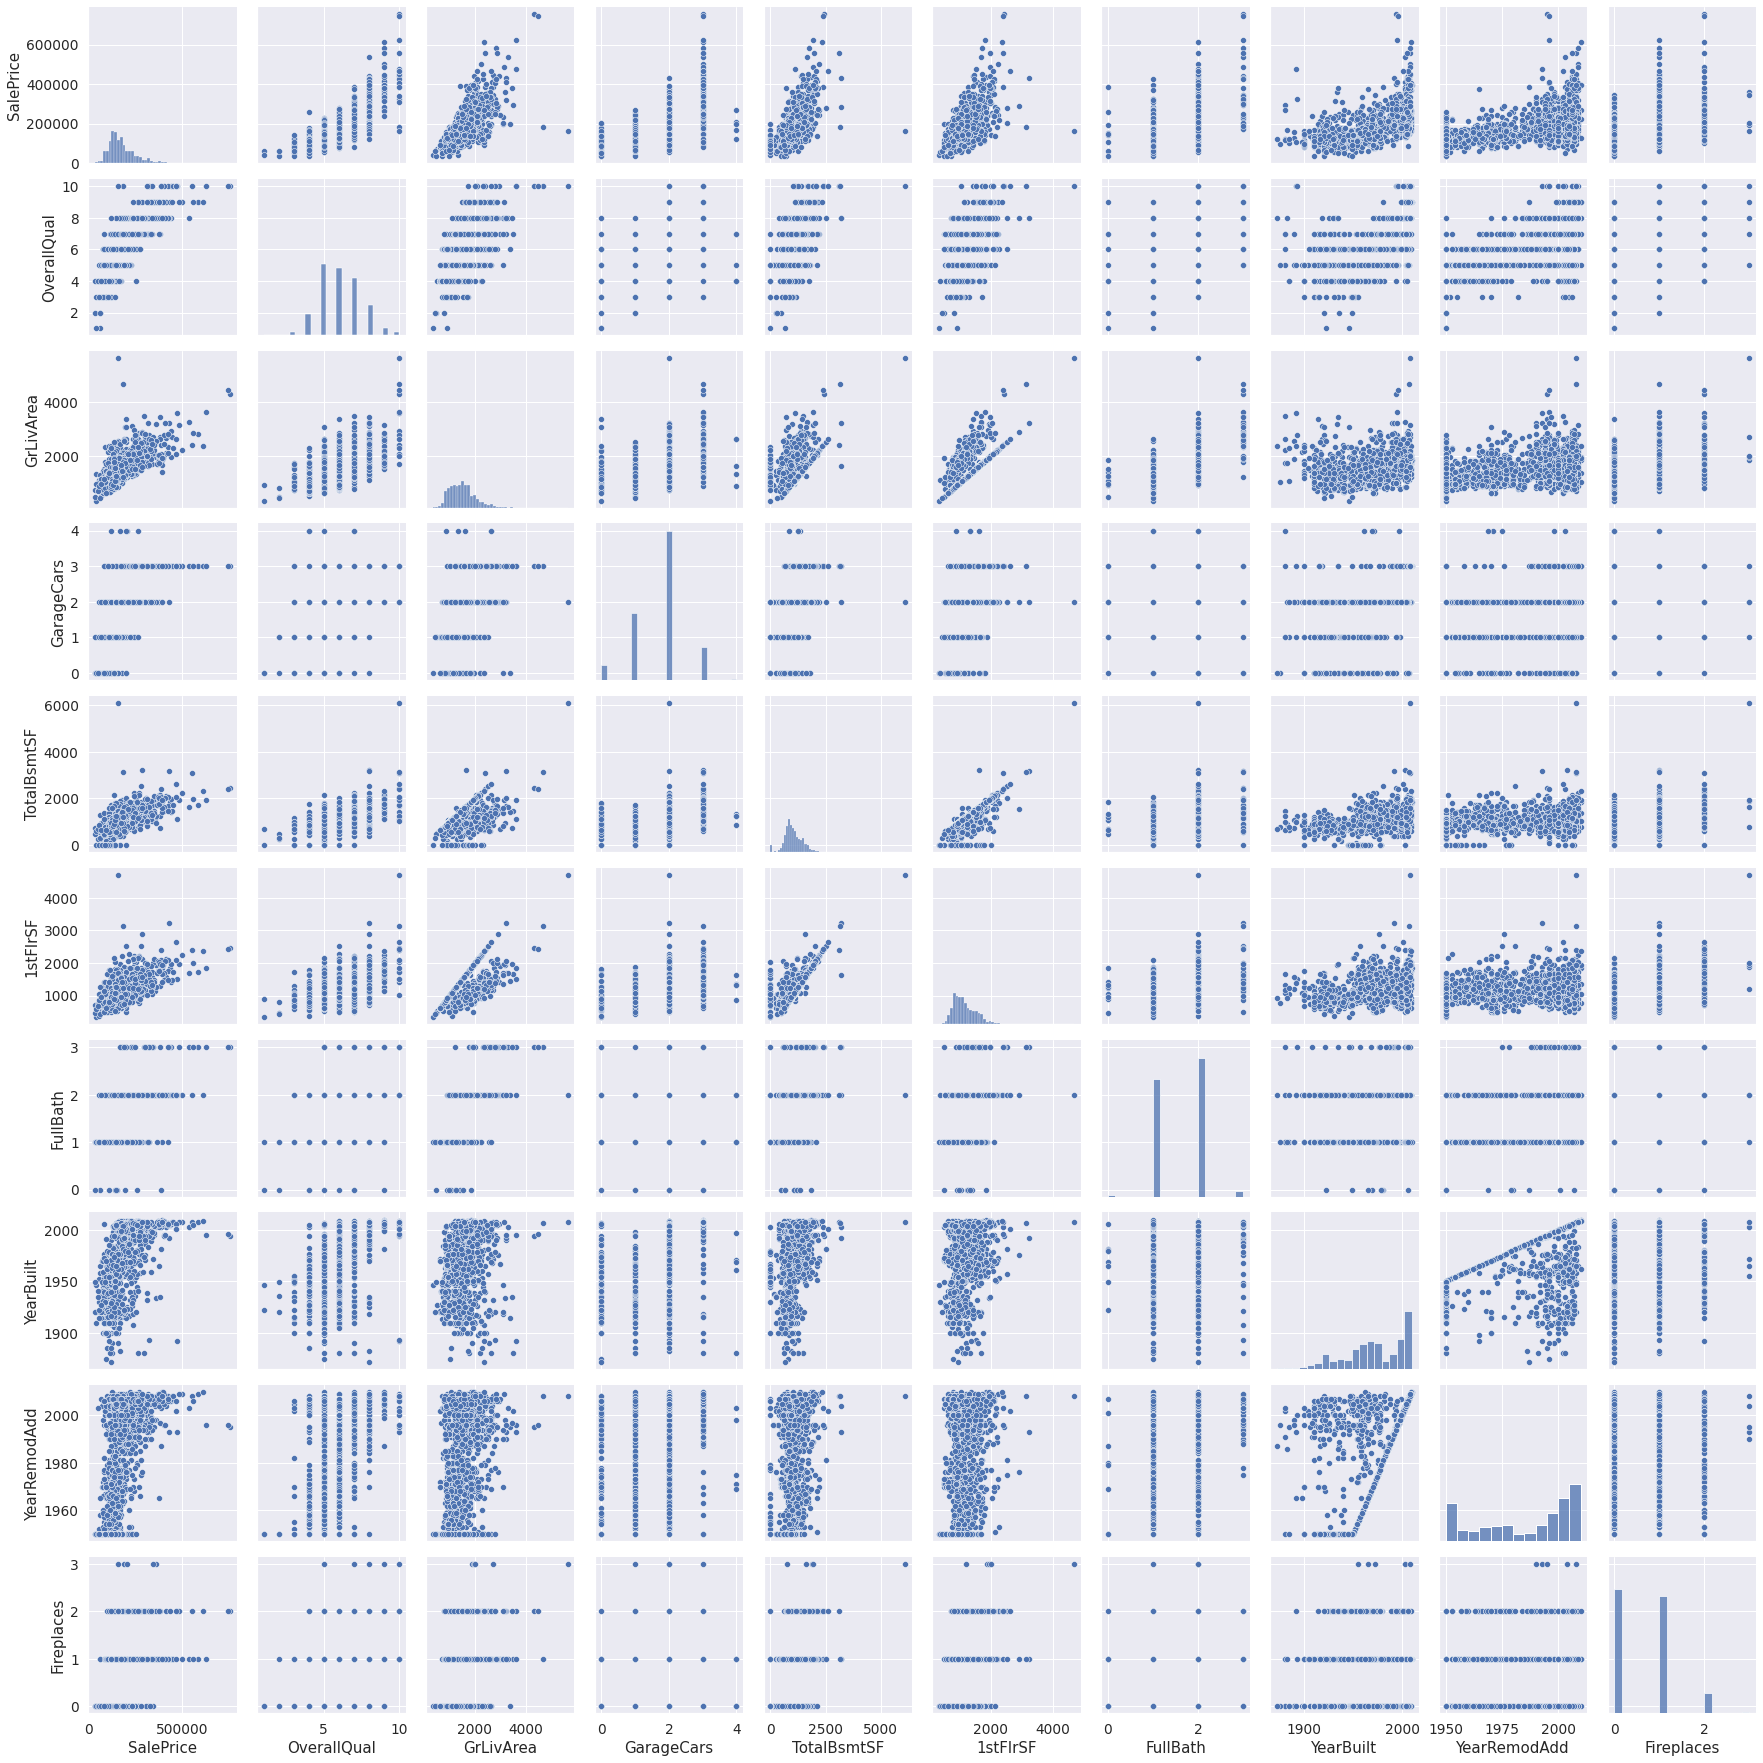

In [18]:
sns.pairplot(X[X.corr().nlargest(10, 'SalePrice')['SalePrice'].index])

Here two oberservations stand out (with large above ground living area and a far below expected sale price).

They appear to be agricultural land which should perhaps be classfied before regression (with large above ground living area and a far below expected sale price).

And a large 1st floor SF and basement SF data points - I imagine a large barn in one of the two likely agricultural land points.

<Figure size 432x288 with 0 Axes>

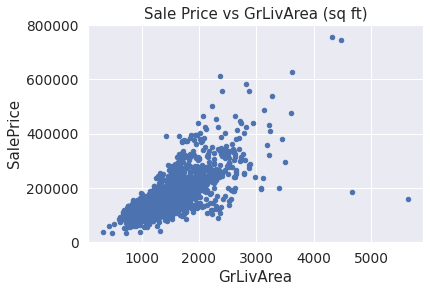

<Figure size 432x288 with 0 Axes>

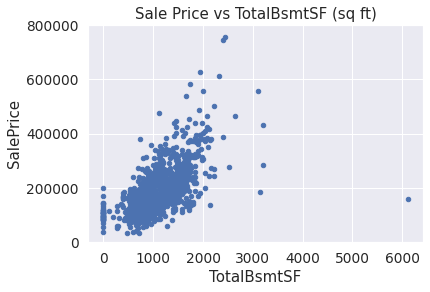

<Figure size 432x288 with 0 Axes>

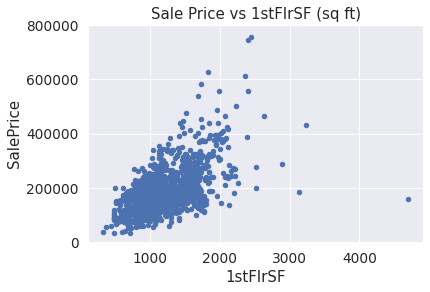

In [19]:
Closer_Look =['GrLivArea', 'TotalBsmtSF', '1stFlrSF']

for col in Closer_Look:
    plt.clf()
    X.plot.scatter(x=col, y= 'SalePrice', ylim=(0,800000))
    plt.title(f'Sale Price vs {col} (sq ft)')
    plt.show()

In [20]:
X.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


<Figure size 432x288 with 0 Axes>

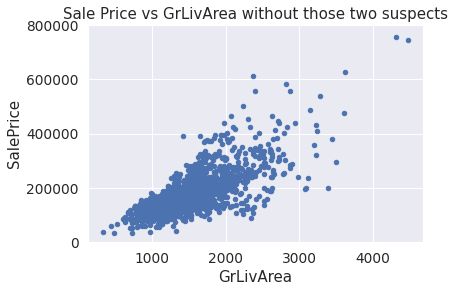

<Figure size 432x288 with 0 Axes>

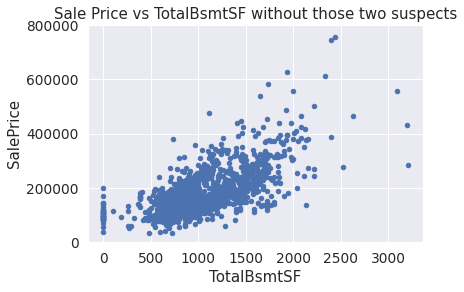

<Figure size 432x288 with 0 Axes>

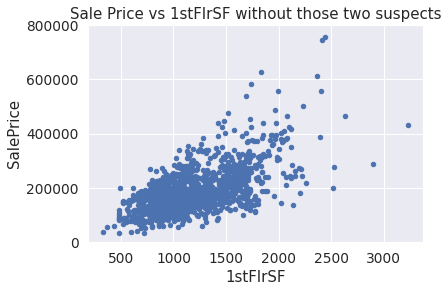

In [21]:
get_on_top=X.sort_values(by = 'GrLivArea', ascending = False)

for col in Closer_Look:
    plt.clf()
    get_on_top[2:].plot.scatter(x=col, y= 'SalePrice', ylim=(0,800000))
    plt.title(f'Sale Price vs {col} without those two suspects')
    plt.show()

Yep that looks better to me.

### Outlier Removal

Unsupervised outlier detection (in this case I used the scikit-learn local outlier factor) removed too much data and worsened results.

But removing those manually identified shows good results in the cross validation (fingers crossed it does in the test data too!)

In [22]:
# X=X.drop(523)
# X=X.drop(1298)

# y=y.drop(523)
# y=y.drop(1298)

### Turns out that it does not. Running again without dropping these two points produced better results

I imagine this is due to the test set containing similar outliers. When the model is trained without these observations it weights the available space highly and therefore when these 'agricultural' observations are seen in the test set a corrispondingly high value is predicited. Even with few these large residuals can contribute a lot. And there could even be many in the test set!

## 2.3. Who's Normal?

In [23]:
features = X.columns

numerical_features = X._get_numeric_data().columns

categorical_features = list(set(features)-set(numerical_features))

numerical_features = list(set(numerical_features))
numerical_features.remove('Id')

In [24]:
skewed_features = X[numerical_features].apply(lambda x: stats.skew(x)).sort_values(ascending = False)
skewness = pd.DataFrame({'skew': skewed_features})

skewness

,skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


Given that many of these are in fact discrete. Let's hone in on the continuous!

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


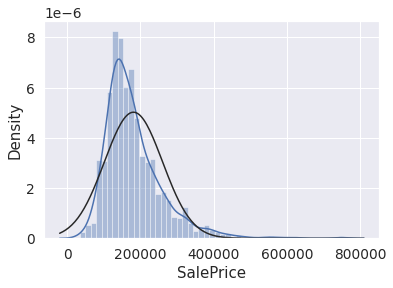

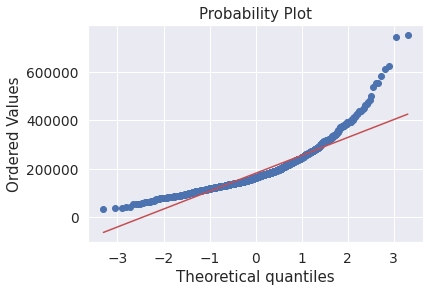

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


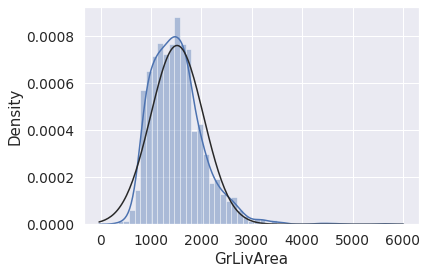

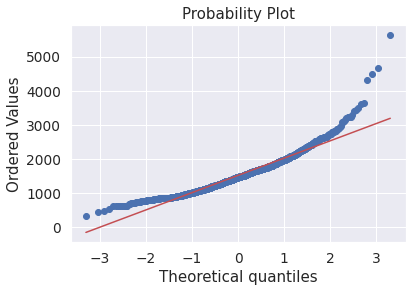

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


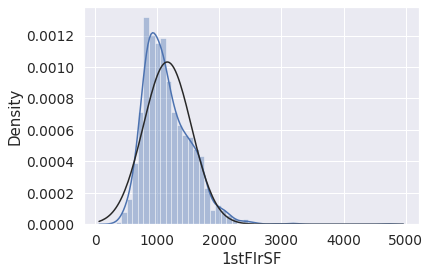

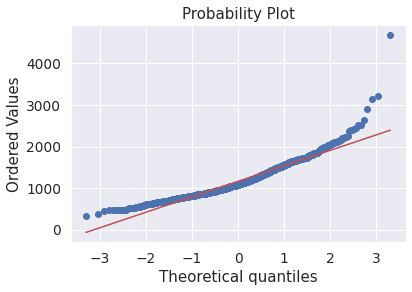

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


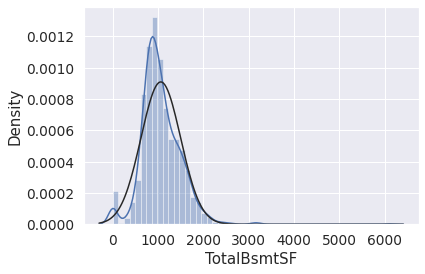

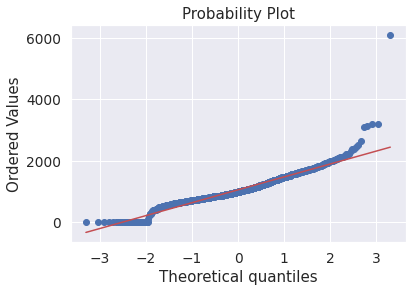

In [25]:
continuous=['SalePrice', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']

for col in continuous:
    plt.clf()
    sns.distplot(X[col], fit=stats.norm);
    fig = plt.figure()
    res = stats.probplot(X[col], plot=plt)
    plt.show()

### Sale Price, Above Ground Living Area & First Floor Area all non-normal and could do from transformations
- Trying a log transformations first
​
### Basement Area too...
- Lack of a basement in many observations means zeros (which can't be log transformed)
- There are many options to deal with this issue, but I like log transformations. I generally find them far easier to interpret anyway.
- So lets just try a log(x+1) as a straight forward workaround

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


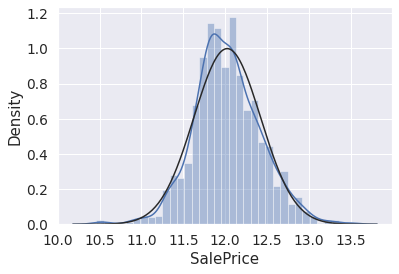

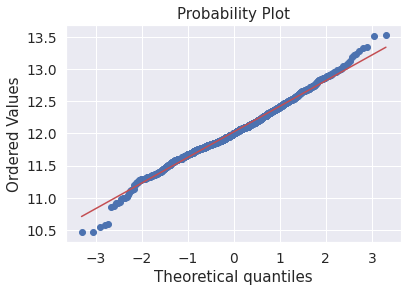

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


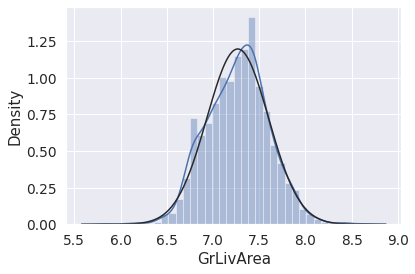

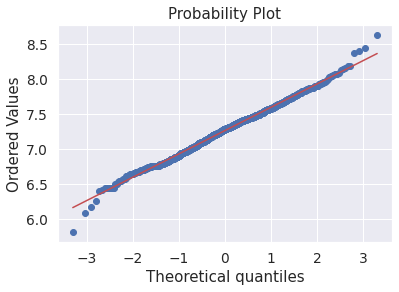

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


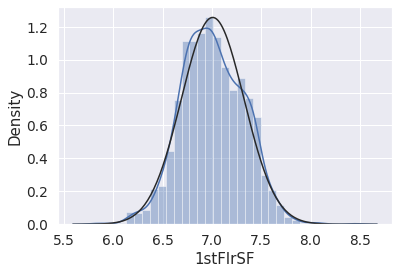

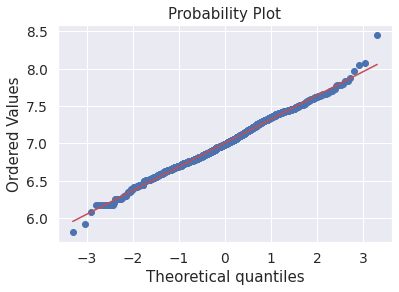

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


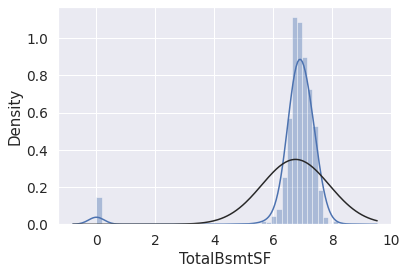

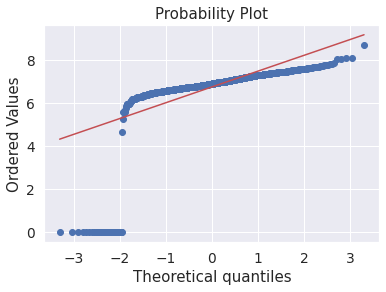

In [26]:
For_investigation=X

for col in continuous:
    if col=='TotalBsmtSF':
        For_investigation[col] = np.log(For_investigation[col] + 1)
    else:
        For_investigation[col] = np.log(For_investigation[col])
    plt.clf()
    sns.distplot(For_investigation[col], fit=stats.norm);
    fig = plt.figure()
    res = stats.probplot(For_investigation[col], plot=plt)
    plt.show()

And a quick look at just those with basements...

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


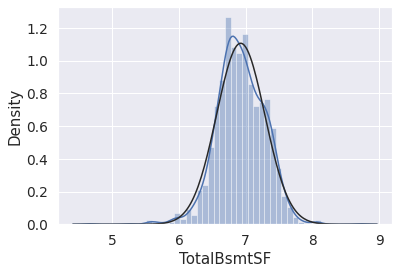

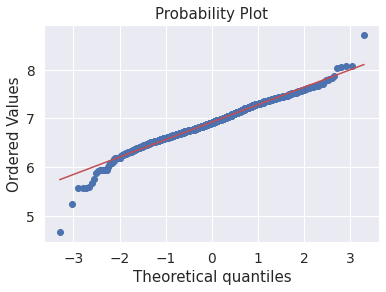

In [27]:
plt.clf()
sns.distplot(For_investigation.TotalBsmtSF[For_investigation['TotalBsmtSF']>0], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(For_investigation.TotalBsmtSF[For_investigation['TotalBsmtSF']>0], plot=plt)
plt.show()

A lot better!

### Improvement in Homoscedasticity Too

Less of the cone shapes we were seeing before (due to the increase in variance of sale price with increase in floor space etc)

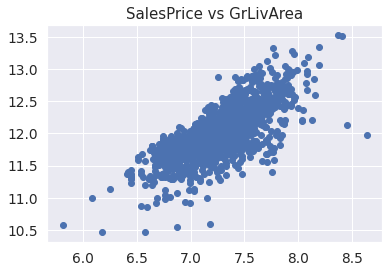

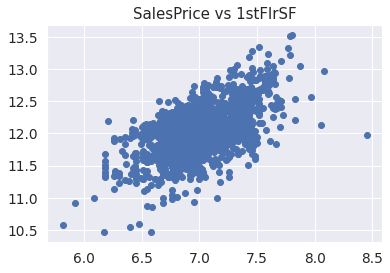

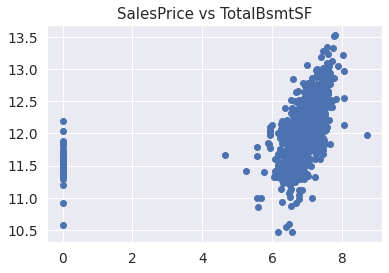

In [28]:
ContFeatures=continuous[1:]
for col in ContFeatures:
    plt.clf()
    plt.scatter(For_investigation[col], For_investigation['SalePrice'])
    plt.title(f'SalesPrice vs {col}')
    plt.show()

Let's us Sci-Kit Learn's Power transformer for a nice neat pipeline. It will do a very similar job, and it's less likely I make a careless mistake!

#### Removing the target from training the data

In [29]:
if 'SalePrice' in X:
    X=X.drop(columns=['SalePrice'])

# 3. Builidng the Pipeline

#### 3.1. One-Hot Encoding categorical features
#### 3.2. Impute missing data
#### 3.3. Transform the skewed features using the handy sci-kit learn Yeo-Johnson transformer
#### 3.4. Scale the remaining features

In [30]:
to_log = ['GrLivArea', '1stFlrSF', 'TotalBsmtSF']
to_scale = list(set(numerical_features)-set(to_log)-set(['SalePrice']))

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_pipe = Pipeline(steps=[('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
                                  ('impute', SimpleImputer())])

log_pipe = Pipeline(steps=[('impute', SimpleImputer()),
                             ('scale', PowerTransformer())])

scale_pipe = Pipeline(steps=[('impute', SimpleImputer()),
                             ('scale', StandardScaler())])

processor = ColumnTransformer(
                transformers=[("oh_encode", categorical_pipe, categorical_features),
                              ("scale", scale_pipe, to_scale),
                              ("log_transform", log_pipe, to_log)])

# 4.  Model Selection & Transforming the Target

In [32]:
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

model = XGBRegressor(random_state=1)

def log_target(y):
    return np.log(y)

def inverse_target(y):
    return np.exp(y)

wrapped_model = TransformedTargetRegressor(regressor=model, func=log_target , inverse_func=inverse_target)

The_Big_Pipe = Pipeline([("prep", processor), ("transformed_regressor", wrapped_model)])

# 5. Hyperparameter Tuning

#### Only baisc tuning was done here as this is less about maximising the score. This is just a fun exercise to practice pipelines and EDA.

#### Used a simple the Sci-Kit Learn gridsearchCV method on Spyder only for a few of the key hyperparameters

In [33]:
model = XGBRegressor(max_depth=3, learning_rate=0.04, n_estimators=1300, colsample_bytree= 0.3, random_state=1)

wrapped_model = TransformedTargetRegressor(regressor=model, func=log_target , inverse_func=inverse_target)

The_Big_Pipe = Pipeline([("prep", processor), ("transformed_regressor", wrapped_model)])

# 6. Cross Validation

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = -1 * cross_val_score(The_Big_Pipe,X, y,
                              cv=cv,
                              scoring='neg_mean_squared_error')

np.sqrt(np.mean(scores))

24557.486722748963

# 7. Predictions

In [35]:
_ = The_Big_Pipe.fit(X,y)

predictions = The_Big_Pipe.predict(df_test)

In [36]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': predictions})

In [37]:
my_submission

,Id,SalePrice
0,1461,154254.296875
1,1462,191445.453125
2,1463,236787.187500
3,1464,242381.156250
4,1465,256873.953125
...,...,...
1454,2915,134776.328125
1455,2916,137844.359375
1456,2917,214165.968750
1457,2918,164028.953125


In [38]:
my_submission.to_csv('submission.csv', index=False)